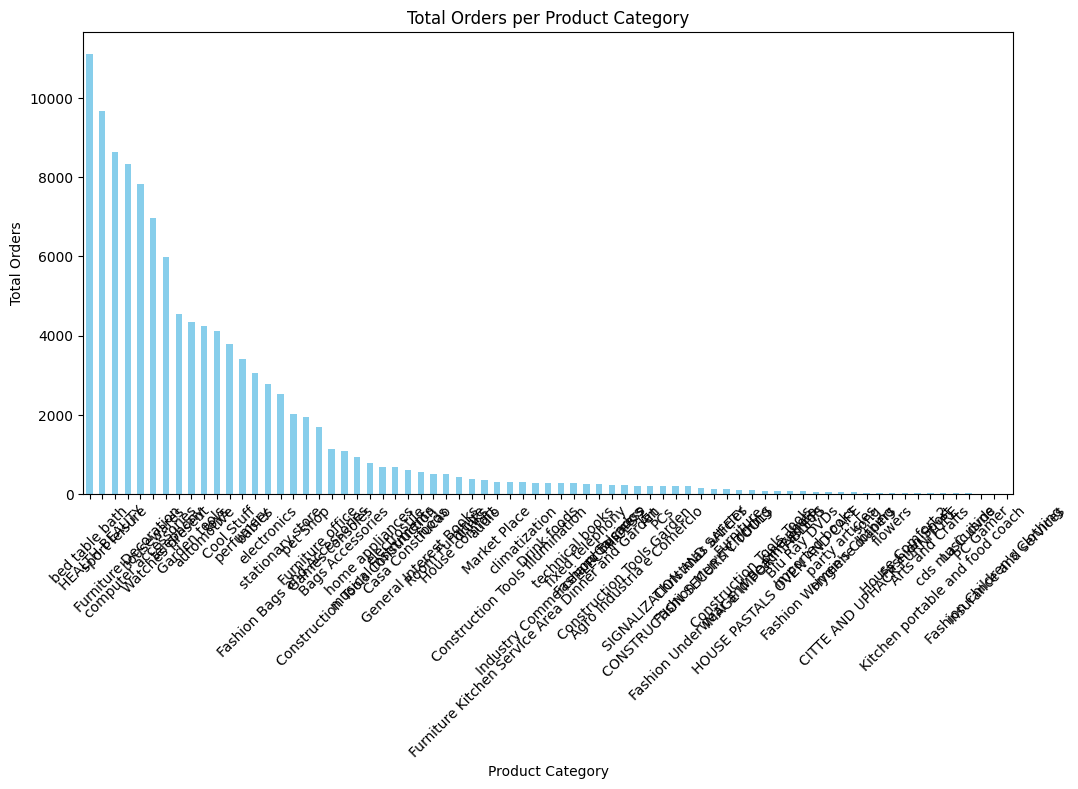

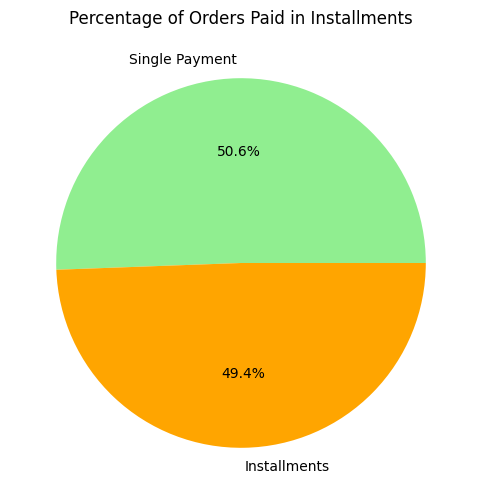

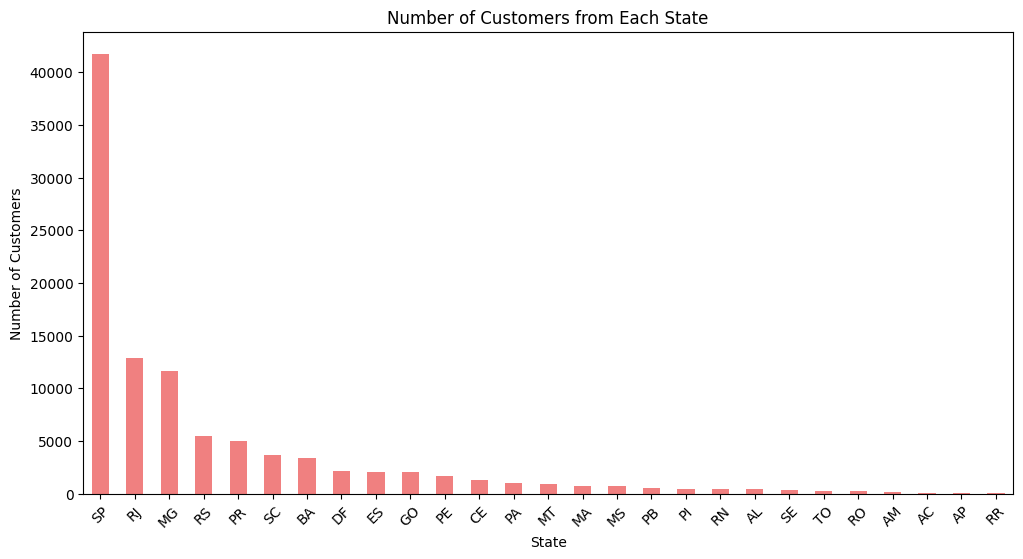

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
products_df = pd.read_csv("products.csv")
orders_df = pd.read_csv("orders.csv")
order_items_df = pd.read_csv("order_items.csv")
payments_df = pd.read_csv("payments.csv")
customers_df = pd.read_csv("customers.csv")

# Merge order items with products to get product categories
merged_df = order_items_df.merge(products_df, on="product_id")
category_counts = merged_df["product category"].value_counts()

# Visualization: Total orders per product category
plt.figure(figsize=(12, 6))
category_counts.plot(kind="bar", color='skyblue')
plt.xlabel("Product Category")
plt.ylabel("Total Orders")
plt.title("Total Orders per Product Category")
plt.xticks(rotation=45)
plt.show()

# Calculate percentage of orders paid in installments
payments_df["installments_flag"] = payments_df["payment_installments"] > 1
installment_counts = payments_df["installments_flag"].value_counts(normalize=True) * 100

# Visualization: Percentage of installment payments
plt.figure(figsize=(6, 6))
installment_counts.plot(kind="pie", autopct='%1.1f%%', colors=["lightgreen", "orange"], labels=["Single Payment", "Installments"])
plt.title("Percentage of Orders Paid in Installments")
plt.ylabel("")  # Hide y-label for aesthetics
plt.show()

# Count the number of customers from each state
state_counts = customers_df["customer_state"].value_counts()

# Visualization: Number of customers per state
plt.figure(figsize=(12, 6))
state_counts.plot(kind="bar", color="lightcoral")
plt.xlabel("State")
plt.ylabel("Number of Customers")
plt.title("Number of Customers from Each State")
plt.xticks(rotation=45)
plt.show()


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
orders_df = pd.read_csv("orders.csv", parse_dates=["order_purchase_timestamp"])
order_items_df = pd.read_csv("order_items.csv")
products_df = pd.read_csv("products.csv")

### 8. Customer Retention Rate (Within 6 Months) ###
# Get first and next purchase timestamps per customer
customer_orders = orders_df.groupby("customer_id")["order_purchase_timestamp"].agg(["min", "count"])
customer_orders.columns = ["first_purchase_date", "total_orders"]

# Filter customers who made more than 1 purchase
repeat_customers = orders_df.merge(customer_orders, on="customer_id")
repeat_customers = repeat_customers[
    (repeat_customers["order_purchase_timestamp"] > repeat_customers["first_purchase_date"]) &
    ((repeat_customers["order_purchase_timestamp"] - repeat_customers["first_purchase_date"]).dt.days <= 180)
]

# Calculate Retention Rate
retention_rate = (repeat_customers["customer_id"].nunique() / customer_orders["customer_id"].nunique()) * 100
print(f"Customer Retention Rate (within 6 months): {retention_rate:.2f}%")

# Visualization
labels = ["Retained", "Not Retained"]
sizes = [repeat_customers["customer_id"].nunique(), customer_orders["customer_id"].nunique() - repeat_customers["customer_id"].nunique()]
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=["lightblue", "gray"])
plt.title("Customer Retention Rate (within 6 months)")
plt.show()


### 9. Relationship Between Product Weight & Dimensions vs Freight Cost ###
# Merge order items with product data
order_products = order_items_df.merge(products_df, on="product_id")

# Scatter plot: Product Weight vs Freight Cost
plt.figure(figsize=(10, 6))
sns.scatterplot(data=order_products, x="product_weight_g", y="freight_value", alpha=0.5)
plt.xlabel("Product Weight (g)")
plt.ylabel("Freight Cost")
plt.title("Relationship Between Product Weight and Freight Cost")
plt.show()

# Scatter plot: Product Volume vs Freight Cost
order_products["product_volume_cm3"] = order_products["product_length_cm"] * order_products["product_height_cm"] * order_products["product_width_cm"]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=order_products, x="product_volume_cm3", y="freight_value", alpha=0.5)
plt.xlabel("Product Volume (cm³)")
plt.ylabel("Freight Cost")
plt.title("Relationship Between Product Volume and Freight Cost")
plt.show()


### 10. Does Order Delivery Time Affect Product Ordering? ###
# Calculate delivery time
orders_df["order_purchase_timestamp"] = pd.to_datetime(orders_df["order_purchase_timestamp"])
orders_df["order_delivered_customer_date"] = pd.to_datetime(orders_df["order_delivered_customer_date"])
orders_df["delivery_time_days"] = (orders_df["order_delivered_customer_date"] - orders_df["order_purchase_timestamp"]).dt.days

# Plot histogram of delivery time
plt.figure(figsize=(10, 6))
sns.histplot(orders_df["delivery_time_days"].dropna(), bins=30, kde=True)
plt.xlabel("Delivery Time (Days)")
plt.ylabel("Number of Orders")
plt.title("Distribution of Order Delivery Time")
plt.show()

# Scatter plot: Delivery Time vs Number of Orders per Month
orders_df["order_month"] = orders_df["order_purchase_timestamp"].dt.to_period("M")
monthly_orders = orders_df.groupby("order_month")["delivery_time_days"].mean()

plt.figure(figsize=(10, 6))
monthly_orders.plot(kind="line", marker="o", color="blue")
plt.xlabel("Month")
plt.ylabel("Average Delivery Time (Days)")
plt.title("Trend of Average Delivery Time Over Time")
plt.show()


KeyError: 'customer_id'

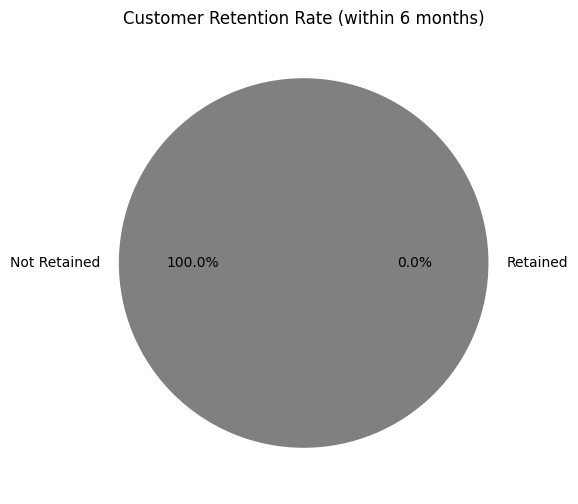

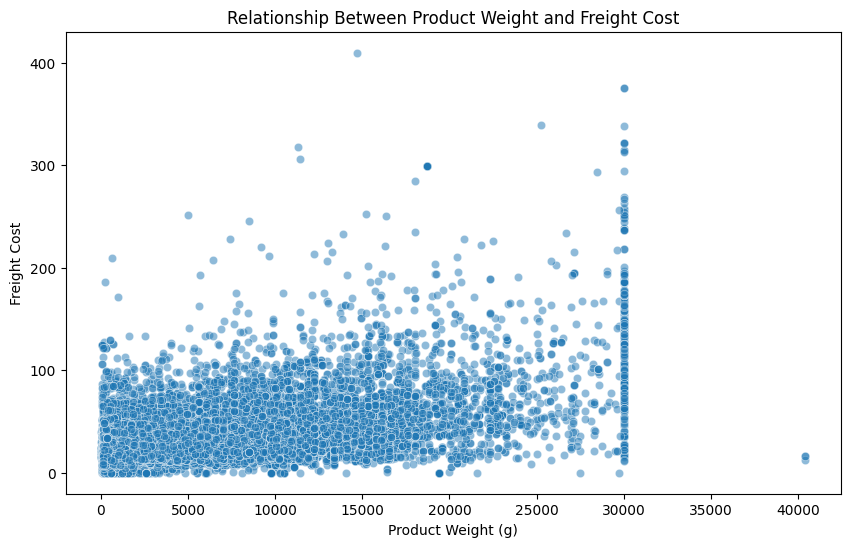

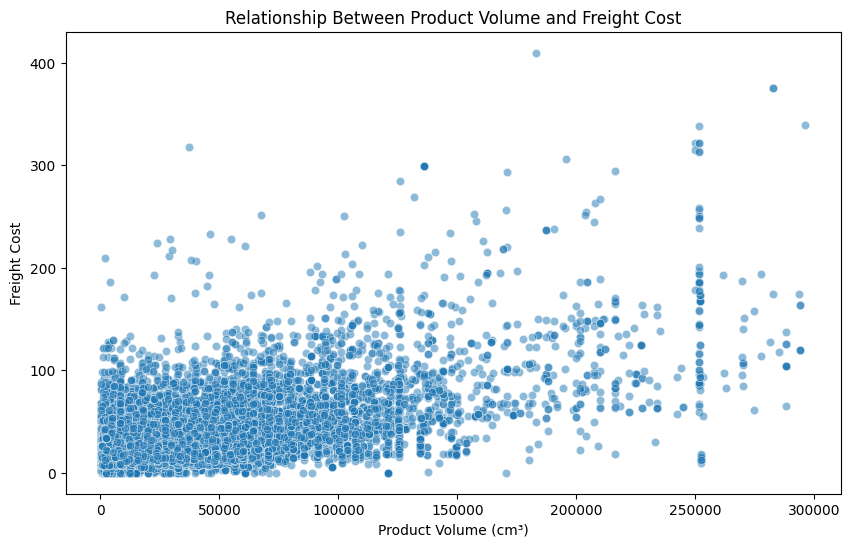

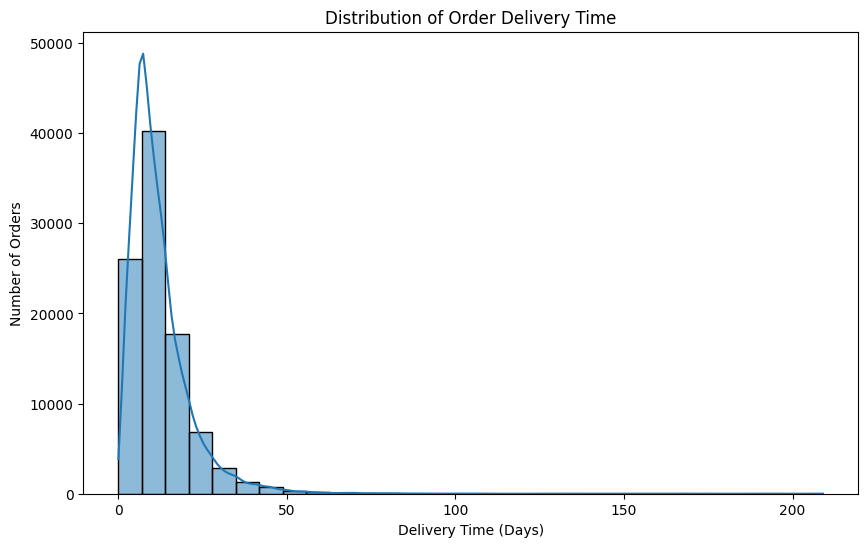

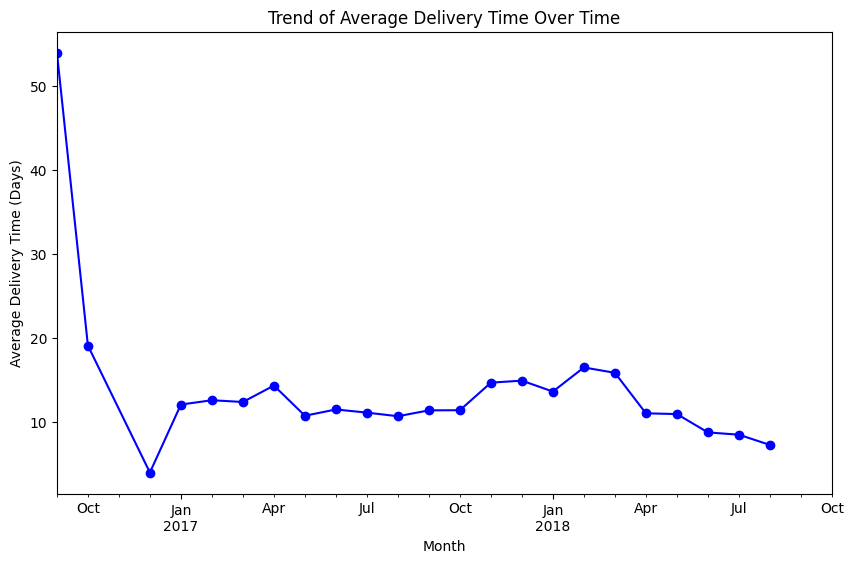

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
orders_df = pd.read_csv("orders.csv", parse_dates=["order_purchase_timestamp", "order_delivered_customer_date"])
order_items_df = pd.read_csv("order_items.csv")
products_df = pd.read_csv("products.csv")
payments_df = pd.read_csv("payments.csv")
customers_df = pd.read_csv("customers.csv")

# Ensure column names are stripped of extra spaces
orders_df.columns = orders_df.columns.str.strip()
order_items_df.columns = order_items_df.columns.str.strip()
products_df.columns = products_df.columns.str.strip()
payments_df.columns = payments_df.columns.str.strip()
customers_df.columns = customers_df.columns.str.strip()

### 8. Customer Retention Rate (Within 6 Months) ###
# Convert necessary columns to datetime format
orders_df["order_purchase_timestamp"] = pd.to_datetime(orders_df["order_purchase_timestamp"])

# Get first purchase date and total orders per customer
customer_orders = orders_df.groupby("customer_id")["order_purchase_timestamp"].agg(["min", "count"]).reset_index()
customer_orders.columns = ["customer_id", "first_purchase_date", "total_orders"]

# Merge with orders dataframe to track repeat purchases
repeat_customers = orders_df.merge(customer_orders, on="customer_id")

# Filter customers who made another purchase within 6 months
repeat_customers = repeat_customers[
    (repeat_customers["order_purchase_timestamp"] > repeat_customers["first_purchase_date"]) &
    ((repeat_customers["order_purchase_timestamp"] - repeat_customers["first_purchase_date"]).dt.days <= 180)
]

# Calculate retention rate
retention_rate = (repeat_customers["customer_id"].nunique() / customer_orders["customer_id"].nunique()) * 100

# Visualization: Retention Rate
labels = ["Retained", "Not Retained"]
sizes = [repeat_customers["customer_id"].nunique(), customer_orders["customer_id"].nunique() - repeat_customers["customer_id"].nunique()]
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=["lightblue", "gray"])
plt.title("Customer Retention Rate (within 6 months)")
plt.show()

### 9. Relationship Between Product Weight & Dimensions vs Freight Cost ###
# Merge order items with product data
order_products = order_items_df.merge(products_df, on="product_id")

# Scatter plot: Product Weight vs Freight Cost
plt.figure(figsize=(10, 6))
sns.scatterplot(data=order_products, x="product_weight_g", y="freight_value", alpha=0.5)
plt.xlabel("Product Weight (g)")
plt.ylabel("Freight Cost")
plt.title("Relationship Between Product Weight and Freight Cost")
plt.show()

# Scatter plot: Product Volume vs Freight Cost
order_products["product_volume_cm3"] = order_products["product_length_cm"] * order_products["product_height_cm"] * order_products["product_width_cm"]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=order_products, x="product_volume_cm3", y="freight_value", alpha=0.5)
plt.xlabel("Product Volume (cm³)")
plt.ylabel("Freight Cost")
plt.title("Relationship Between Product Volume and Freight Cost")
plt.show()

### 10. Does Order Delivery Time Affect Product Ordering? ###
# Calculate delivery time
orders_df["delivery_time_days"] = (orders_df["order_delivered_customer_date"] - orders_df["order_purchase_timestamp"]).dt.days

# Plot histogram of delivery time
plt.figure(figsize=(10, 6))
sns.histplot(orders_df["delivery_time_days"].dropna(), bins=30, kde=True)
plt.xlabel("Delivery Time (Days)")
plt.ylabel("Number of Orders")
plt.title("Distribution of Order Delivery Time")
plt.show()

# Scatter plot: Delivery Time vs Number of Orders per Month
orders_df["order_month"] = orders_df["order_purchase_timestamp"].dt.to_period("M")
monthly_orders = orders_df.groupby("order_month")["delivery_time_days"].mean()

plt.figure(figsize=(10, 6))
monthly_orders.plot(kind="line", marker="o", color="blue")
plt.xlabel("Month")
plt.ylabel("Average Delivery Time (Days)")
plt.title("Trend of Average Delivery Time Over Time")
plt.show()
